In [4]:
%matplotlib inline 
# above line allows for showing plots in a cell easily
import matplotlib # the main plotting library
#matplotlib.style.use('ggplot')
import numpy as np # allows for arrays
import matplotlib.pyplot as plt # getting specific plotting functions
import urllib # URL import functions
import pandas as pd # nice data utilities

In [5]:
q=pd.read_table('./data/log_1.csv', header=0,sep=',',names=['t','tm','s']);

TypeError: xlabel() missing 1 required positional argument: 's'

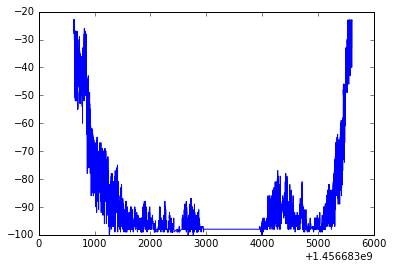

In [6]:
plt.plot(q.t,q.s); plt.xlabel()

In [7]:
6000/60

100.0

Below is from https://ocefpaf.github.io/python4oceanographers/blog/2014/05/05/folium/ ...

In [8]:
#fname = './data/DHO.kml'
fname = './data/DHO_cwv_GoogleEarth.kml'

In [9]:
a=open(fname).read();

In [10]:
from xml.dom.minidom import parseString

In [11]:
dom=parseString(a)

In [12]:
latitudes=[]
longitudes=[]


for d in dom.getElementsByTagName('coordinates'):
    coords=d.firstChild.data.split(',')
    longitudes.append(float(coords[0]))
    latitudes.append(float(coords[1]))

In [13]:
timeList=dom.getElementsByTagName('when')
coordList=dom.getElementsByTagName('gx:coord')
placeList=dom.getElementsByTagName('TimeStamp')
#print(timeList[0].toxml())
#print(len(reflist))
print(len(timeList))
print(len(coordList))
print(len(placeList))

821
801
20


I think this means: skip the 'when' items that have 'TimeStamp' associated with them. I.e., the first len(placeList) items. 

In [14]:
times=timeList[(len(placeList)+1):];coords=coordList[:(len(coordList)-1)]

In [15]:
print(times[0].toxml())
print(coords[0].toxml())
print(len(coords)); print(len(times))

<when>2016-02-28T18:22:17.000Z</when>
<gx:coord>-70.976616 43.15733 48.8</gx:coord>
800
800


Yes, this matches the file ... 

In [16]:
t=[]
for ts in times:
    #t.append(ts.firstChild.data.split('.')[0])
    t.append(ts.firstChild.data)

In [17]:
lat=[]
lon=[]
alt=[]
for c in coords:
    thisc = c.firstChild.data.split(' ')
    lat.append(float(thisc[0]))
    lon.append(float(thisc[1]))
    alt.append(float(thisc[2]))

In [18]:
t[222]

'2016-02-28T18:42:21.000Z'

In [19]:
import time
pattern='%Y-%m-%dT%H:%M:%S.000Z'
tGPS=[]
timeShift=18000 #GPS is 5 hours off, which is 18000 seconds
for ts in t:
    thisTime=int(time.mktime(time.strptime(ts, pattern)))-timeShift
    tGPS.append(thisTime)

In [20]:
tGPS[0]

1456683737

In [21]:
tLog=[]
for ts in q.t:
    tLog.append(int(ts))

In [29]:
# start with some metric

diffBest=(tLog[0])**4

# now go through and compare
# tMatch will be a list containing an index into tLog for the closest time to any given tGPS time
tMatch=[]
for i in range(0,len(tGPS)):
    for j in range(0,len(tLog)):
        diff=(tLog[j]-tGPS[i])**2
        if diff<diffBest:
            diffBest=diff
            index=j
        tMatch.append(index)

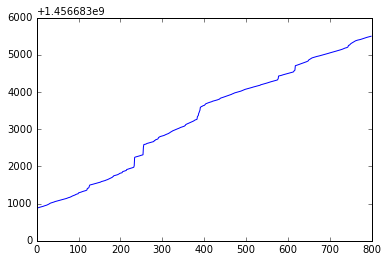

In [30]:
   plt.plot(tGPS) 

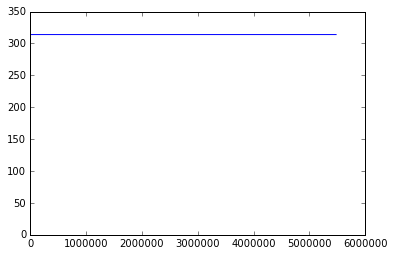

In [31]:
plt.plot(tMatch)

# testing

In [172]:
tL=tLog[11]
d=[]
for tG in tGPS:
    d.append((tG-18000)-tL)

In [173]:
ly=[]
for i in range(0,len(tLog)):
    ly.append(1.)
gy=[]
for i in range(0,len(tGPS)):
    gy.append(2.)

In [174]:
print(len(ly));print(len(gy))

6850
800


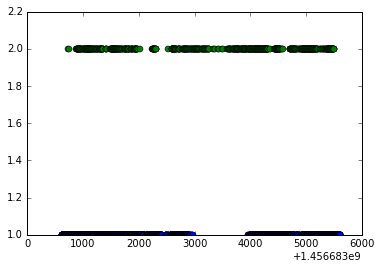

In [177]:
plt.plot(tLog,ly,'o');plt.plot(tGPS,gy,'o')

# Detecting the timeshift

In [142]:
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(tLog[0]))

'2016-02-28 13:20:30'

In [143]:
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(tGPS[0]))

'2016-02-28 18:22:17'

In [145]:
tGPS[0]-tLog[0]

18107

So, we're off by 5 hours ...

In [146]:
5*60*60

18000

Which is 18000 seconds.